# importing modules

In [68]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
from nltk.corpus import stopwords

# loading the dataset

In [69]:
df= pd.read_csv('spam.csv',encoding='utf-8', encoding_errors='ignore')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
df=df[['v2','v1']]
df=df.rename(columns={'v2':'message','v1':'label'})
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


# preprocessing the dataset

In [71]:
#check for null values
df.isnull().sum()

message    0
label      0
dtype: int64

In [72]:

stopwords= set(stopwords.words('english') )

def clean_text(text):
    text=text.lower()
    text=re.sub(r'^0_9a-zA-Z',' ',text)
    text=re.sub(r'\s+',' ',text)
    text=" ".join(word for word in text.split() if word not in stopwords)
    return text



In [73]:
df['clean_text'] = df['message'].apply(clean_text)
df.head()

,message,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,"go jurong point, crazy.. available bugis n gre..."
1,Ok lar... Joking wif u oni...,ham,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor... u c already say...
4,"Nah I don't think he goes to usf, he lives aro...",ham,"nah think goes usf, lives around though"




# input split

In [74]:
X = df['clean_text']
y = df['label']

# model_training

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.metrics import confusion_matrix


def classify(model,X,y):
    x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True,stratify=y)
    pipeline_model =Pipeline([('vect',CountVectorizer()),
                            ('tfidf',TfidfTransformer()),
                            ('clf',model)])
    pipeline_model.fit(x_train,y_train)
    
    
    print('Accuracy:', pipeline_model.score(x_test,y_test)*100)
    cv_score=cross_val_score(model,X,y,cv=5)
    print("cv_score:",np.mean(cv_score)*100)
    
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test,y_pred))
    
    # Calculate confusion matrix

    
    cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Logistic Regression)')  
    plt.show()
   

Accuracy: 96.8413496051687
cv_score: nan
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.76      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\shree\anaconda3\lib

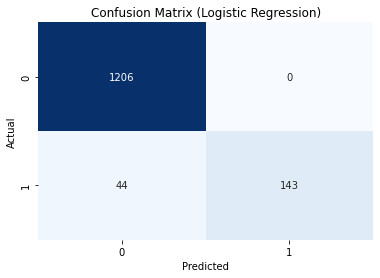

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy: 96.69777458722182
cv_score: nan
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 663, in fit
    X, y = self._check_X_y(X, y)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 523, in _check_X_y
    return self._validate_data(X, y, accept_sparse="csr", reset=reset)
  File "C:\Users

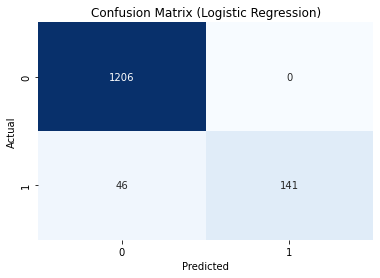

In [77]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
classify(model,X,y)

Accuracy: 98.27709978463747
cv_score: nan


C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\shree\anaconda3\lib\site-packages

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



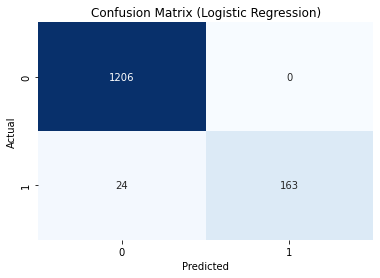

In [78]:
from sklearn.svm import SVC
model = SVC(C=5)
classify(model,X,y)

Accuracy: 97.70279971284997
cv_score: nan


C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\shree\anaconda3\lib\site-p

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       1.00      0.83      0.91       187

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393



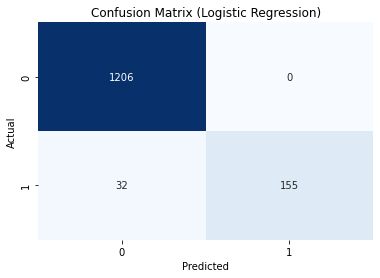

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [81]:
def generate_wordcloud(text_data):
    # Combine all text data into a single string
    all_text = ' '.join(text_data)
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


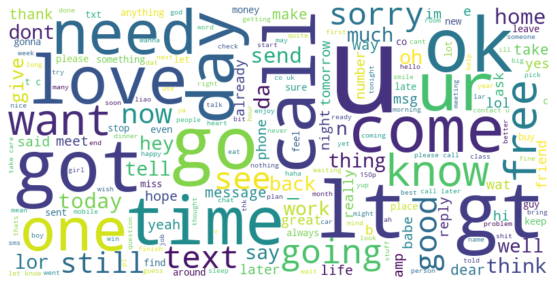

In [82]:
# Generate and display a word cloud from cleaned text data
generate_wordcloud(df['clean_text'])


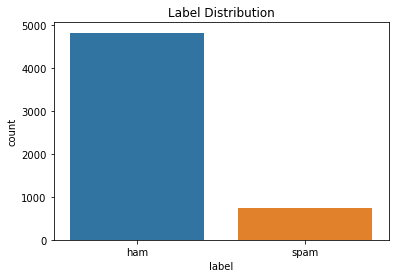

In [83]:
# Countplot for label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Label Distribution')
plt.show()


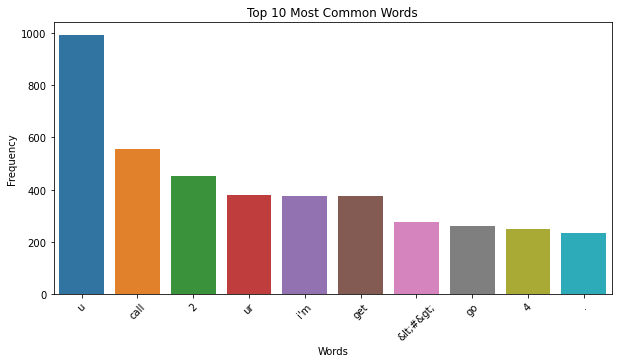

In [84]:
from collections import Counter

# Tokenize the cleaned text data (assuming each word is separated by a space)
words = ' '.join(df['clean_text']).split()

# Calculate word frequencies
word_freq = Counter(words)

# Create a barplot of the most common words
most_common_words = word_freq.most_common(10)  # Change the number as needed
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()
